Populating the interactive namespace from numpy and matplotlib
[[-0.41105274+1.35218931j -0.27628869+0.95971081j]
 [-0.27628869-0.95971081j -0.41105274-1.35218931j]]


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


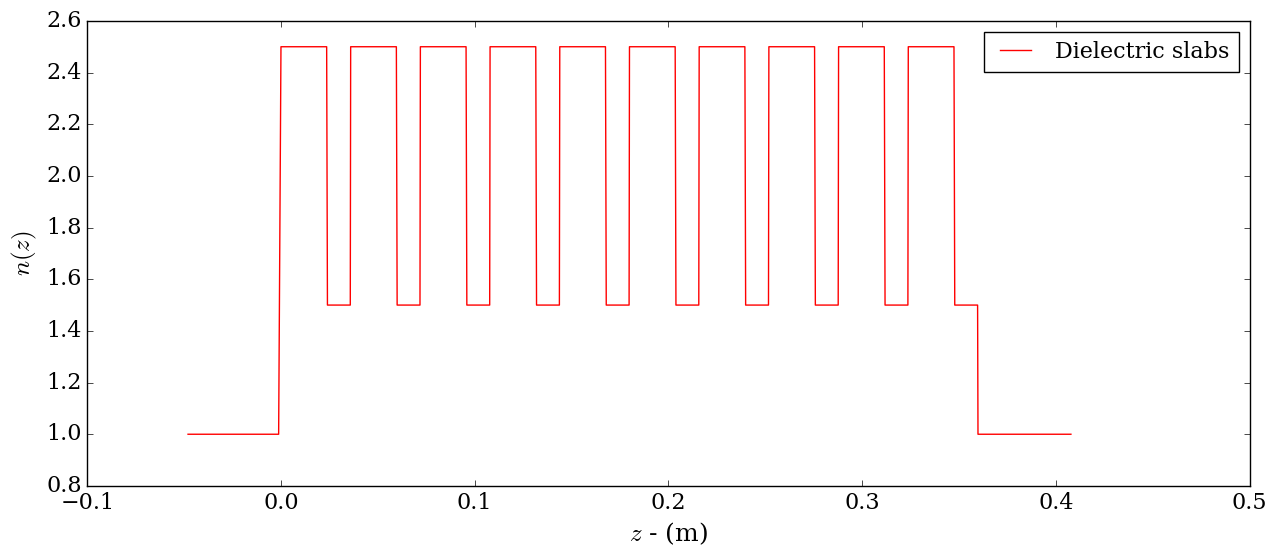

In [8]:
%reload_ext autoreload
%autoreload

%pylab inline

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *

import os
dir_name = 'Course-Advanced-EM/session-2'
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

freq = 5.0*constants.giga
l_0 = constants.c/freq
theta = 60.0*np.pi/180.0

pc_emn = TMM_EM_N(freq, theta, TETM='TE')

d_ratio = 0.4
n = np.array([2.5, 1.5])
d = np.array([l_0*d_ratio, l_0*d_ratio/2])

n_layer = 10

n_p, d_p = pc_emn.RepeatProfile(n, d, n_layer)


n_0, n_1 = 1.0, 1.0
pc_emn.SetupMultilayer(n_0, n_1, n_p, d_p)

TM = pc_emn.GetTMTotal()
print(TM)

T, R = pc_emn.GetTransmissionReflection()

d_sides = d[0]*2.0
n_pts_0, n_pts_1 = 40, 40
n_pts_i = 60

[z_pts, n_vec] = pc_emn.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
figsize(15, 6)

fig = figure()
plot(z_pts, np.real(n_vec), 'r', label='Dielectric slabs')

xlabel('$z$ - (m)', fontsize=18)
ylabel('$n(z)$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

file_name = os.path.join(dir_name, 'tmm-profile'+file_ext)
savefig(file_name)
show()


Populating the interactive namespace from numpy and matplotlib


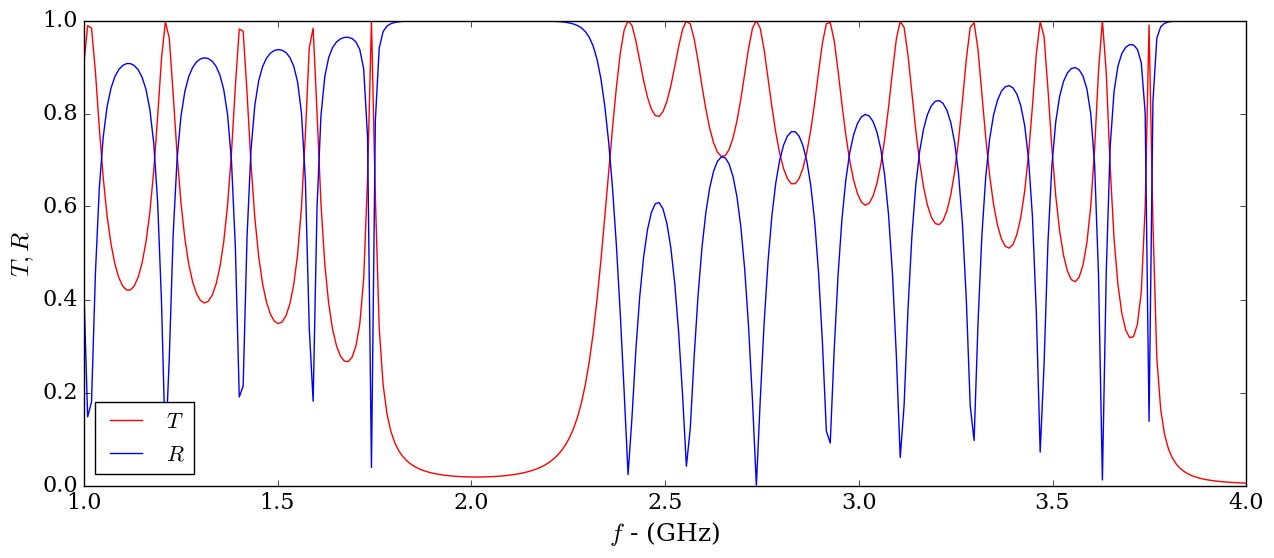

In [9]:
%pylab inline

f_0 = 1.0*constants.giga
f_1 = 4.0*constants.giga
N = 300

f, T, R = pc_emn.GetTransmissionReflectionFreqBand(f_0, f_1, N)

figsize(15, 6)

plot(f/1.0e9, abs(T), 'r', label='$T$')
plot(f/1.0e9, abs(R), 'b', label='$R$')

xlabel('$f$ - (GHz)', fontsize=18)
ylabel('$T, R$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

file_name = os.path.join(dir_name, 'tmm-TR'+file_ext)
savefig(file_name)
show()


Populating the interactive namespace from numpy and matplotlib


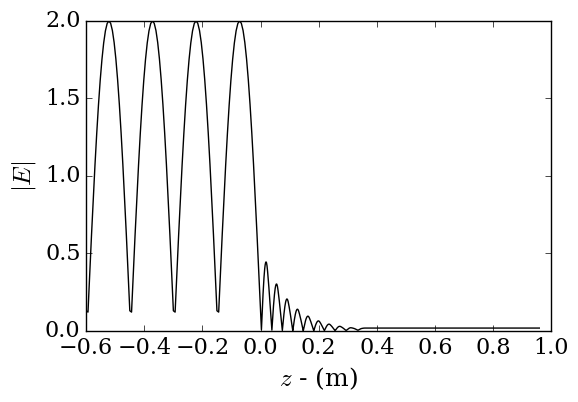

In [12]:
%pylab inline

pc_emn.SetFrequency(2.0*constants.giga)

[z_pts, E_FWD, E_BWD] = pc_emn.GetFieldPlot(100, 30, 100)
            
#plot(z_pts, np.abs(E_FWD), 'r', label='forward')
#plot(z_pts, np.abs(E_BWD), 'b', label='backward')
plot(z_pts, np.abs(E_FWD+E_BWD), 'k', label='total')


xlabel('$z$ - (m)', fontsize=18)
ylabel('$|E|$', fontsize=18)
#legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

file_name = os.path.join(dir_name, 'tmm-E-mag'+file_ext)
savefig(file_name)
show()

